## Import Libraries and Data

In [8]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_04-12-05-23.csv', firstRow=390, lastRow=396)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_080523_S391-396.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [9]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=82s and ended at t=520s; mass=44.77465g
This equals a volume of 44.864m; expected was 44.957mL; error is 0.205%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


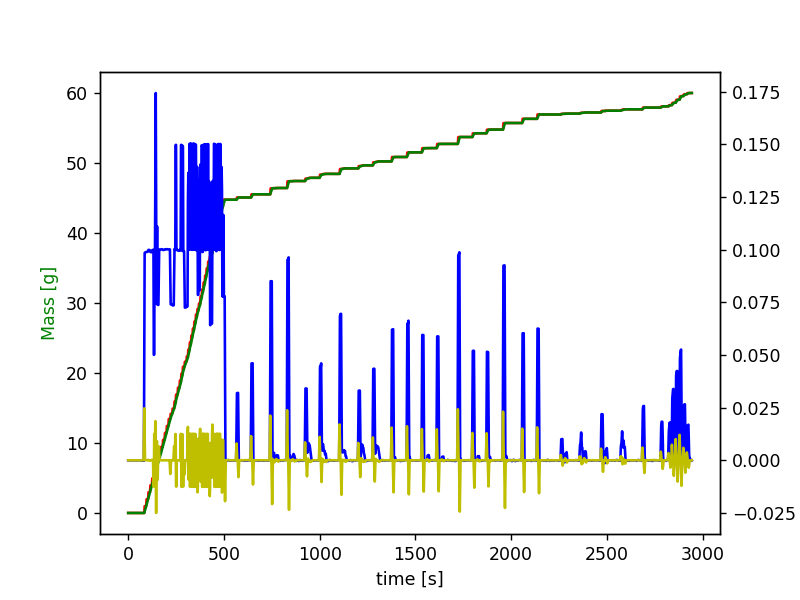

Addition of 0.318g Texapon SB 3 KC detected from 562s to 582s - expected volume = 0.545mL and actual volume = 0.288mL (resulting error is 47.181%)
Addition of 0.459g Texapon SB 3 KC detected from 638s to 658s - expected volume = 0.545mL and actual volume = 0.415mL (resulting error is 23.798%)
Addition of 0.907g Plantapon ACG 50 detected from 738s to 790s - expected volume = 0.85mL and actual volume = 0.806mL (resulting error is 5.157%)
Addition of 1.002g Plantapon ACG 50 detected from 826s to 876s - expected volume = 0.857mL and actual volume = 0.879mL (resulting error is 2.549%)
Addition of 0.465g Plantapon LC 7 detected from 920s to 962s - expected volume = 0.519mL and actual volume = 0.438mL (resulting error is 15.699%)
Addition of 0.565g Plantapon LC 7 detected from 996s to 1040s - expected volume = 0.519mL and actual volume = 0.533mL (resulting error is 2.559%)
Addition of 0.788g Plantacare 2000 detected from 1100s to 1146s - expected volume = 0.855mL and actual volume = 0.721mL (

In [26]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


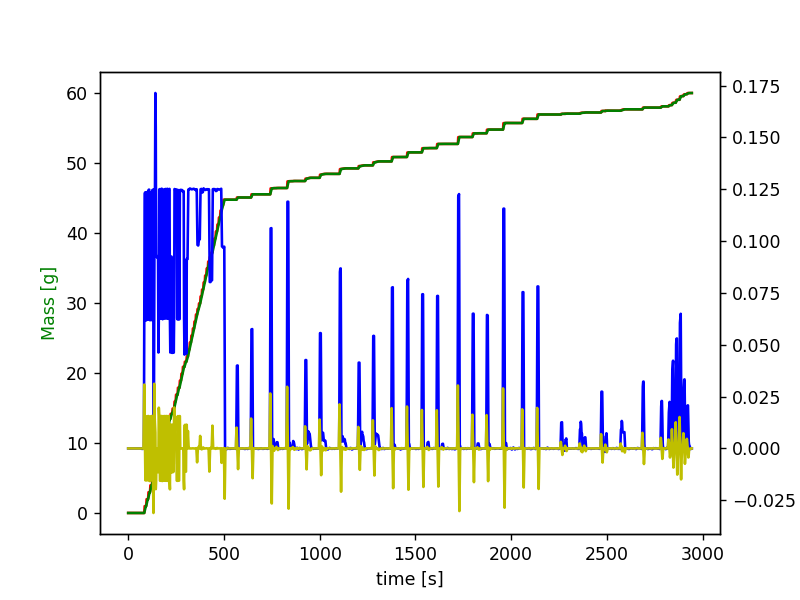

Addition of 0.624g Dehyquart CC6 detected from 2132s to 2150s - expected volume = 0.106mL and actual volume = 0.589mL (resulting error is 457.031%)
Addition of 0.128g Dehyquart CC6 detected from 2256s to 2296s - expected volume = 0.114mL and actual volume = 0.121mL (resulting error is 6.095%)
Addition of 0.169g Dehyquart CC6 detected from 2354s to 2396s - expected volume = 0.243mL and actual volume = 0.162mL (resulting error is 33.268%)
Addition of 0.262g Dehyquart CC6 detected from 2466s to 2506s - expected volume = 0.131mL and actual volume = 0.248mL (resulting error is 90.127%)
Addition of 0.197g Dehyquart CC6 detected from 2568s to 2600s - expected volume = 0.267mL and actual volume = 0.188mL (resulting error is 29.57%)
Addition of 0.255g Dehyquart CC6 detected from 2682s to 2702s - expected volume = 0.145mL and actual volume = 0.24mL (resulting error is 65.422%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


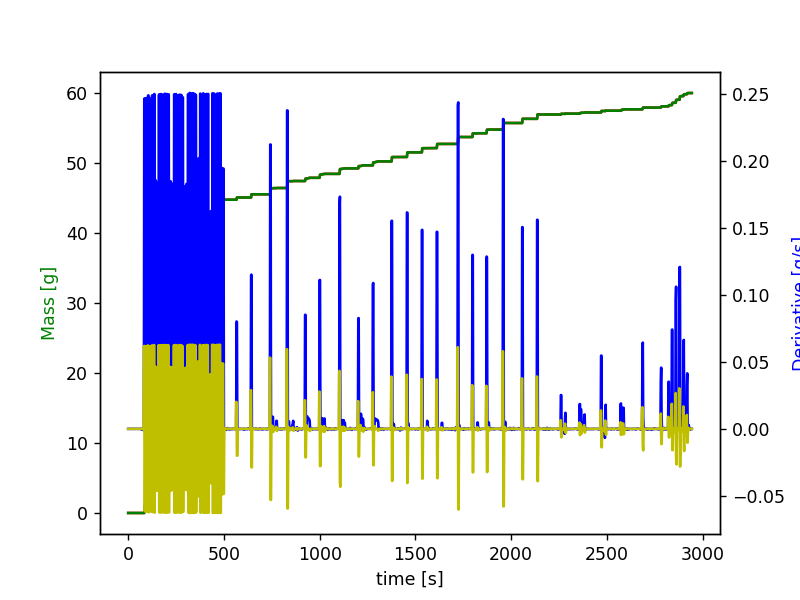

Addition of 0.183g Arlypon TT detected from 2778s to 2792s - expected volume = 0.182mL and actual volume = 0.19mL (resulting error is 4.286%)
Addition of 0.179g Arlypon TT detected from 2818s to 2834s - expected volume = 0.338mL and actual volume = 0.186mL (resulting error is 44.923%)
Addition of 0.339g Arlypon TT detected from 2836s to 2852s - expected volume = 0.412mL and actual volume = 0.356mL (resulting error is 13.648%)
Addition of 0.422g Arlypon TT detected from 2856s to 2870s - expected volume = 0.512mL and actual volume = 0.439mL (resulting error is 14.329%)
Addition of 0.525g Arlypon TT detected from 2876s to 2892s - expected volume = 0.202mL and actual volume = 0.552mL (resulting error is 173.437%)
Addition of 0.265g Arlypon TT detected from 2896s to 2910s - expected volume = 0.13mL and actual volume = 0.275mL (resulting error is 112.4%)


In [27]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_080523_S385-S390.csv', index=False)
actualMassFractions